In [19]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium
from sklearn.cluster import KMeans
#data = pd.read_csv("../input/nyc-public-wifi/NYC_Wi-Fi_Hotspot_Locations.csv")
data = pd.read_csv("../input/nyc-wi-fi-hotspot-locations/nyc-wi-fi-hotspot-locations.csv")
data.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,Location_T,Remarks,City,SSID,SourceID,Activated,BoroCode,BoroName,NTACode,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,1,BK,Limited Free,ALTICEUSA,Wingate Park,HAWTHRONE ST 1 P/W/BROOKLYN AV,40.65831,-73.94406,999770.788172,179121.427240,Outdoor,3 free 10 min sessions,Brooklyn,GuestWiFi,NaN,NaN,3,Brooklyn,BK60,Prospect Lefferts Gardens-Wingate,40.0,11203,309.0,810.0,3081000.0,0.0,3.048110e+09,867,"{'needs_recoding': False, 'latitude': '40.6583..."
1,2,BK,Limited Free,ALTICEUSA,Wingate Park,HAWTHRONE ST 1 P/N/O/BROOKLYN AV,40.65800,-73.94723,998891.326348,179007.939934,Outdoor,3 free 10 min sessions,Brooklyn,GuestWiFi,NaN,NaN,3,Brooklyn,BK60,Prospect Lefferts Gardens-Wingate,40.0,11203,309.0,810.0,3081000.0,0.0,0.000000e+00,868,"{'needs_recoding': False, 'latitude': '40.658'..."
2,3,BK,Limited Free,ALTICEUSA,Wingate Park,HAWTHRONE ST 1 P/N/O/BROOKLYN AV,40.65800,-73.94723,998891.326348,179007.939934,Outdoor,3 free 10 min sessions,Brooklyn,GuestWiFi,NaN,NaN,3,Brooklyn,BK60,Prospect Lefferts Gardens-Wingate,40.0,11203,309.0,810.0,3081000.0,0.0,0.000000e+00,869,"{'needs_recoding': False, 'latitude': '40.658'..."
3,4,BK,Limited Free,ALTICEUSA,Wingate Park,HAWTHRONE ST 1 P/S/O BROOKLYN AV,40.65743,-73.94716,998910.873553,178800.284838,Outdoor,3 free 10 min sessions,Brooklyn,GuestWiFi,NaN,NaN,3,Brooklyn,BK60,Prospect Lefferts Gardens-Wingate,40.0,11203,309.0,810.0,3081000.0,3107446.0,3.048200e+09,870,"{'needs_recoding': False, 'latitude': '40.6574..."
4,5,BK,Limited Free,ALTICEUSA,Wingate Park,HAWTHRONE ST 1 P/S/O/BROOKLYN AV,40.65743,-73.94716,998910.873553,178800.284838,Outdoor,3 free 10 min sessions,Brooklyn,GuestWiFi,NaN,NaN,3,Brooklyn,BK60,Prospect Lefferts Gardens-Wingate,40.0,11203,309.0,810.0,3081000.0,3107446.0,3.048200e+09,871,"{'needs_recoding': False, 'latitude': '40.6574..."


Looking at the Neighborhood Tabular Areas (a type of neighborhood area designation used by the City of New York) assigned to the various WiFi nodes, we see that far and away the most "popular" areas for putting up a hotspot are in Manhattan.

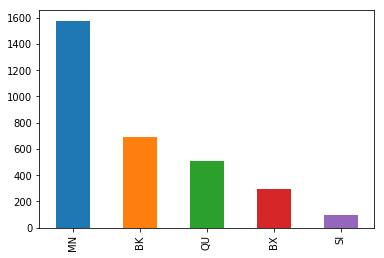

In [20]:
data['Borough'].value_counts().plot.bar()

What happens when we try to cluster?

In [21]:
data['Provider'].value_counts()

LinkNYC - Citybridge       1731
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Spot On Networks              4
Partner                       2
Name: Provider, dtype: int64

In [22]:
from sklearn.cluster import KMeans
selection = data[data['Provider'] == 'LinkNYC - Citybridge']
kmeans = KMeans(n_clusters=5, random_state=0).fit(selection[['Latitude', 'Longitude']].values)
labels = kmeans.labels_

colors = ['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba']
display = folium.Map(location=[40.75, -74])


for (lat, long, label) in zip(selection['Latitude'], selection['Longitude'], labels):
    folium.CircleMarker([lat, long],
                    radius=5,
                    color=colors[label],
                    fill_color=colors[label],
                   ).add_to(display)
    
display

The WiFi hotspots are (logically) concentrated alongside certain arterial roadways. What stands out is how strong that effect is. 3rd Avenue and 8th Avenue in Manhattan both "stand out" in terms of their WiFi offerings, as do certain other roadways, like Queens Boulevard.